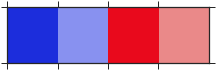

In [1]:
from __future__ import division
from scipy import stats
from scipy.stats.stats import pearsonr, spearmanr
import scikits.bootstrap as boot
from scipy.stats import ttest_rel
import itertools
import myhddm

os.chdir('/Users/kyle/Dropbox/PFH/iPFH/')
colors=["#0000B8",'#005CE6',"#89a0ff","#990000" ,'#FF1919', "#ea8989"]
clist=[blues[-4], blues[-3], reds[-4], reds[-2]]

clist = hs([blues[::-1], reds[::-1]]).tolist()[::-1]
b=['#1c2ddc', '#8891f0']
r=['#e9091c', '#ea8989']
clist=hs([b, r]).tolist()
sns.palplot(clist)

In [ ]:
#Normalizing functions for all speed models
spds_norma=lambda x: x/(spds.a-(spds.a * spds.z))
spds_normb=lambda x: x/(spds.a * spds.z)

spd_norma=lambda x: x/(spd.a-(spd.a * spd.z))
spd_normb=lambda x: x/(spd.a * spd.z)
#spd_normF2A=lambda x: x/(spd.a-(spd.a * spd.z))
#spd_normH2A=lambda x: x/(spd.a * spd.z)

msms_norma=lambda x: x/(msms.a-(msms.a * msms.zF))
msms_normb=lambda x: x/(msms.a * msms.zH)

In [2]:
#b=colors[:3]
#r=colors[3:]
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/')
diff = pd.read_csv('diff_rho_df.csv')

## Speed Models: Params and Norm Functions
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxPARAM')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/idxPARAM')
#msm.to_csv("msm_rho_df.csv")
#MSM Model RhoDF (named rho_df in previous notebooks)
msm=pd.read_csv("msm_rho_df.csv", index_col='idx')

#SpeedSimple, Speed, and MSMS models RhoDF
spds=pd.read_csv("speed_simple_rho_df.csv")
spd=pd.read_csv("speed_model_rho_df.csv")
msms=pd.read_csv("msms_rho_df.csv")

# WIN, BW, & WSS Peaks for FFA and PPA Regions

In [4]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxPK')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/idxPK/')
#WIN Peaks
wpk_ppa=pd.read_csv("ppa_rho_df.csv", index_col='idx')
wpk_ffa=pd.read_csv("ffa_rho_df.csv", index_col='idx')

#BW Peaks
bpk_ppa=pd.read_csv("ppa_bw_rhodf.csv", index_col='idx')
bpk_ffa=pd.read_csv("ffa_bw_rhodf.csv", index_col='idx')

#WSS Peaks
spk_ppa=pd.read_csv("ppa_wss_rhodf.csv", index_col='idx')
spk_ffa=pd.read_csv("ffa_wss_rhodf.csv", index_col='idx')

# WIN & WSS Min for FFA and PPA Regions

In [5]:

os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxLO')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/idxLO/')
#WIN Minimum of TC
wlo_ppa=pd.read_csv("win_ppalow_rhodf.csv", index_col='idx')
wlo_ffa=pd.read_csv("win_ffalow_rhodf.csv", index_col='idx')

#WSS Minimum of TC
slo_ppa=pd.read_csv("wss_ppalow_rhodf.csv", index_col='idx')
slo_ffa=pd.read_csv("wss_ffalow_rhodf.csv", index_col='idx')

In [6]:
os.chdir('/Users/kyle/Dropbox/PFH/iPFH/idxTC')
#os.chdir('/home/kyle/Dropbox/PFH/iPFH/IdxTC/')

#WIN Timecourses
wtc_ffa = pd.read_csv('WIN_AllSx_FaceClusters.csv', index_col='idx')
wtc_ppa = pd.read_csv('WIN_AllSx_HouseClusters.csv', index_col='idx')

#BW Timecourses
btc_ffa = pd.read_csv('BW_AllSx_FaceClusters.csv', index_col='idx')
btc_ppa = pd.read_csv('BW_AllSx_HouseClusters.csv', index_col='idx')

#WSS Timecourses
stc_ffa = pd.read_csv('WSS_AllSx_FaceClusters.csv', index_col='idx')
stc_ppa = pd.read_csv('WSS_AllSx_HouseClusters.csv', index_col='idx')
btc_d=btc_ffa.copy()
wtc_d=wtc_ffa.copy()
stc_d=stc_ffa.copy()

btc_d.loc[:,'1':] = btc_ffa.loc[:, '1':]-btc_ppa.loc[:, '1':]
wtc_d.loc[:,'1':] = wtc_ffa.loc[:, '1':]-wtc_ppa.loc[:, '1':]
stc_d.loc[:,'1':] = stc_ffa.loc[:, '1':]-stc_ppa.loc[:, '1':]

In [98]:
xinterp=[]

xinterp=hs([np.linspace(x[i], x[i+1], 1000) for i in range(len(x)-1)])
yinterp=np.interp(xinterp, x, y)

In [108]:
yinterp

array([-0.02661, -0.02665, -0.0267 , ..., -0.00139, -0.00133, -0.00127])

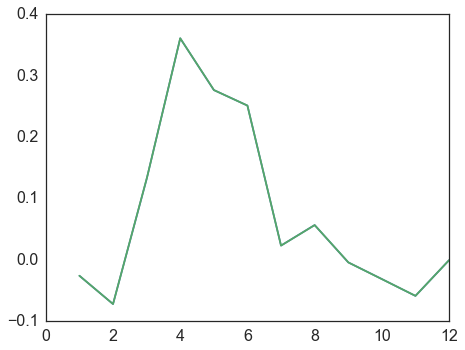

In [107]:
plt.plot(x, y)
plt.plot(xinterp, yinterp, marker='x', ms=20)

In [7]:
def calc_idx_slope(dff, idx):
      
      #dff = df.drop('idx')
      
      x = array([int(C) for C in dff.loc[:,'1':].columns])
      y = dff[dff.idx==idx].loc[:,'1':].values[0]

      xinterp=hs([np.linspace(x[i], x[i+1], 1000) for i in range(len(x)-1)]).astype(float)
      yinterp=np.interp(xinterp, x, y)
      
      pk_index = yinterp.argmax()
      leadedge = yinterp[:pk_index]
      
      ypeak = yinterp[pk_index]
      ylow = .15*ypeak
      
      if np.all(leadedge>ylow):
            yonset=leadedge[0]
            xonset=xinterp[0]
      else:
            yonset = yinterp[leadedge[leadedge<=ylow].argmax()]
            xonset = xinterp[leadedge[leadedge<=ylow].argmax()]
      
      xpeak = xinterp[pk_index]

      return (ypeak-yonset)/(xpeak-xonset), leadedge


In [266]:

bold=[stc_ppa.query('cond=="HFast"'), stc_ppa.query('cond=="HSlow"'), 
      HMean_STC,
      stc_ffa.query('cond=="FFast"'), stc_ffa.query('cond=="FSlow"'),
      FMean_STC]

In [299]:
ix_sorted = np.argsort(bi_slopes)
sl = array(bi_slopes)[ix_sorted]
ledges = array(edge)[ix_sorted]


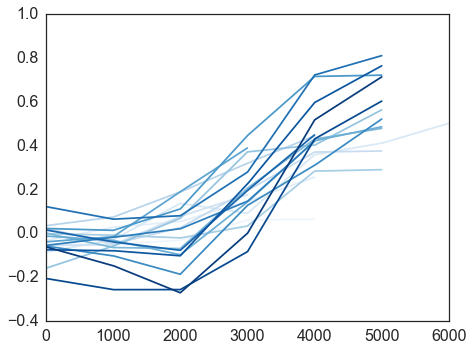

In [300]:
c=sns.color_palette('Blues', n_colors=len(ledges))
for i, ldg in enumerate(ledges):
      plt.plot(ldg, color=c[i])

In [315]:
all_slopes=[]
all_edge=[]
for bi in bold:
      bi_slopes=[]
      edge=[]
      if 'cond' in bi.columns:
            bi=bi.drop('cond', axis=1)
      if bi.index.name=='idx':
            bi=bi.reset_index()
      for idx in bi.idx.values:
            sl, le = calc_idx_slope(bi[bi.idx==idx], idx)
            bi_slopes.append(sl)
            edge.append(le)
            
      all_slopes.append(np.asarray(bi_slopes))
      all_edge.append(edge)

In [307]:
all_slopes=[]
all_edge=[]
for bi in bold:
      bi_slopes=[]
      edge=[]
      if 'cond' in bi.columns:
            bi.drop('cond', axis=1, inplace=True)
      if bi.index.name=='idx':
            bi=bi.reset_index()
      for idx in bi.idx.values:
            sl, le = calc_idx_slope(bi[bi.idx==idx], idx)
            bi_slopes.append(sl)
            edge.append(le)
            
      all_slopes.append(np.asarray(bi_slopes))
      all_edge.append(edge)

/Users/kyle/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
x = [int(C) for C in bi[bi.idx==8].loc[:,'1':].columns]
y = bi[bi.idx==8].loc[:,'1':].values[0]

xinterp=hs([np.linspace(x[i], x[i+1], 1000) for i in range(len(x)-1)])
yinterp=np.interp(xinterp, x, y)

In [112]:
yinterp[yinterp.argmax()]

0.36026391999999996

In [57]:
bi.apply(lambda x: x['1':].argmax(), axis=1).values

array(['4', '6', '5', '6', '6', '4', '6', '6', '6', '6', '6', '7', '5',
       '5', '6', '6', '6', '5', '5'], dtype=object)

In [41]:
def get_col_name(row):    
      b = (df.ix[row.name] == row['value'])
      return b.index[b.argmax()]

bi.apply(get_col_name, axis=1)
#bi.iloc[:, 1:].max(axis=1)

NameError: ("global name 'df' is not defined", u'occurred at index 0')

In [66]:
for i, (xi, bi) in enumerate(zip(x, bold)):
      mx = bi.apply(lambda x: x['1':].argmax(), axis=1).values[i]
      print pearsonr(xi, bi[bi>0].loc[:, '1':mx].sum(axis=1))

(0.43117729424642987, 0.065307851976424788)
(0.69305860032080757, 0.0010025031585769513)
(0.70304486862201565, 0.00078627623539856623)
(-0.16970728968558382, 0.48731772128541162)
(-0.35572861520542748, 0.13498898496649672)
(-0.041890311317314632, 0.86479517560837915)


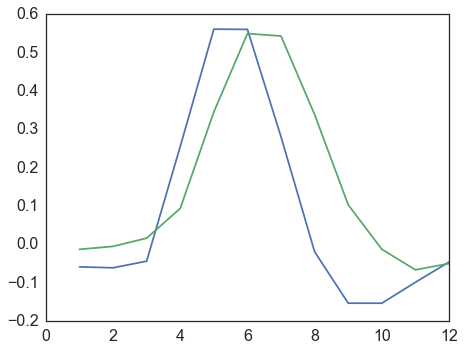

In [305]:
plt.plot(stc_ffa.query('cond=="FFast"').mean()-stc_ppa.query('cond=="FFast"').mean())

plt.plot(stc_ffa.query('cond=="FSlow"').mean()-stc_ppa.query('cond=="FSlow"').mean())

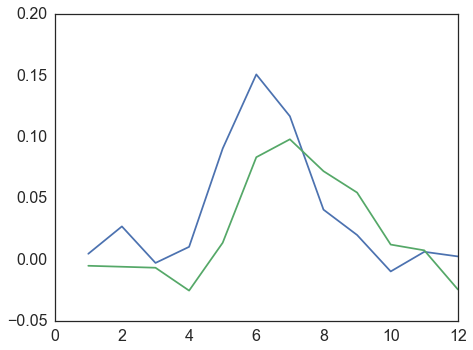

In [294]:
plt.plot(-stc_ppa.query('cond=="FFast"').mean())
plt.plot(-stc_ppa.query('cond=="FSlow"').mean())

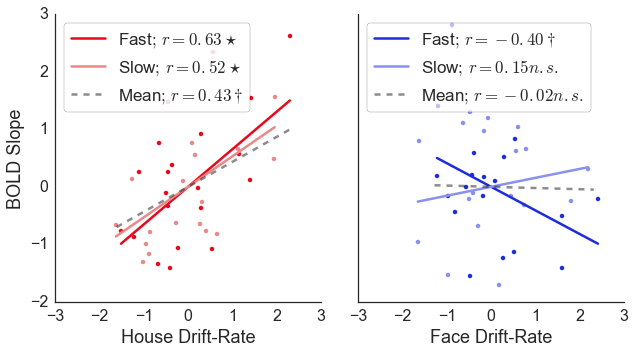

In [318]:
brain = 'BOLD Slope'
param = 'Drift-Rate'
stim = ['House','Face']
cond = hs(['Fast', 'Slow', 'Mean']*2).tolist()

x=[spd_normb(spd.vHFast.values), spd_normb(spd.vHSlow.values), 
   np.mean([spd_normb(spd.vHFast.values), spd_normb(spd.vHSlow.values)], axis=0), 
   spd_norma(spd.vFFast.values), spd_norma(spd.vFSlow.values),
   np.mean([spd_norma(spd.vFFast.values), spd_norma(spd.vFSlow.values)], axis=0)]

#bold=[spk_ppa["HFast"], spk_ppa["HSlow"],
#      np.mean([spk_ppa["HFast"].values, spk_ppa["HSlow"].values], axis=0),
#      spk_ffa["FFast"], spk_ffa["FSlow"],
#      np.mean([spk_ffa["FFast"].values, spk_ffa["FSlow"].values], axis=0)]

HMean_STC = pd.concat([stc_ppa.query('cond=="HFast"').loc[:, '1':], stc_ppa.query('cond=="HSlow"').loc[:, '1':]]).reset_index().groupby('idx').mean()
FMean_STC = pd.concat([stc_ffa.query('cond=="FFast"').loc[:, '1':], stc_ffa.query('cond=="FSlow"').loc[:, '1':]]).reset_index().groupby('idx').mean()

bold=[stc_ppa.query('cond=="HFast"').loc[:, '1':], stc_ppa.query('cond=="HSlow"').loc[:, '1':], 
      HMean_STC,
      stc_ffa.query('cond=="FFast"').loc[:, '1':], stc_ffa.query('cond=="FSlow"').loc[:, '1':],
      FMean_STC]

f = corrplots(x, all_slopes, brain, param, stim, cond, direct='pos', start='2', 
                  normalize=True, test='pearson', calc_slope=False)

#bold=[get_auc(bb) for bb in bold]
#f = corrplots(x, bold, brain, param, stim, cond, direct='pos', start='2', 
#                  normalize=True, test='pearson', calc_slope=True)
#f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for ax in axes:
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
f.savefig('/Users/kyle/Dropbox/WSS_SlopeDrift_pearson.png', dpi=600)

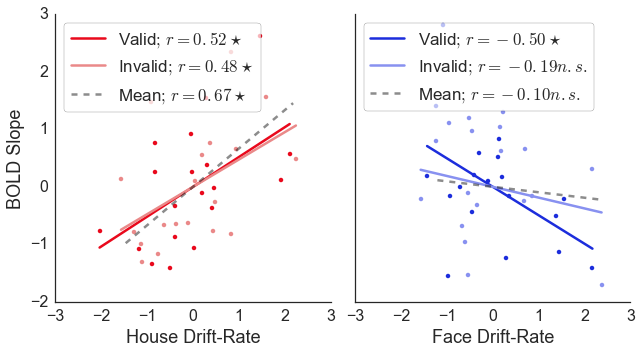

In [257]:
brain = 'BOLD Slope'
param = 'Drift-Rate'
stim = ['House','Face']
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values, 
   np.mean([msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values], axis=0), 
   msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values,
   np.mean([msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values], axis=0)]

HMean_WTC = pd.concat([wtc_ppa.query('cond=="hchouse"').loc[:, '1':], wtc_ppa.query('cond=="fchouse"').loc[:, '1':]]).reset_index().groupby('idx').mean()
FMean_WTC = pd.concat([wtc_ffa.query('cond=="fcface"').loc[:, '1':], wtc_ffa.query('cond=="hcface"').loc[:, '1':]]).reset_index().groupby('idx').mean()

bold=[wtc_ppa.query('cond=="hchouse"'), wtc_ppa.query('cond=="fchouse"'),
      HMean_WTC,
      wtc_ffa.query('cond=="fcface"'), wtc_ffa.query('cond=="hcface"'),
      FMean_WTC]


f = corrplots(x, all_slopes, brain, param, stim, cond, direct='pos', start='1', 
                  normalize=True, test='pearson', calc_slope=False)

axes=f.axes
for ax in axes:
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      
#f.savefig('/home/kyle/Desktop/WIN_DriftSlope_NormA_pearson.png', dpi=600)

In [327]:
msm.zH2b*msm.vHH

idx
8     3.65443
10    2.51698
11    0.66308
13    4.60212
15    2.66176
16    2.49647
17    2.58351
18    3.10331
19    2.58779
20    2.64306
21    2.69142
22    2.03343
23    2.60830
24    2.90549
26    2.70968
27    2.22004
29    2.51104
30    3.50373
31    2.80976
dtype: float64

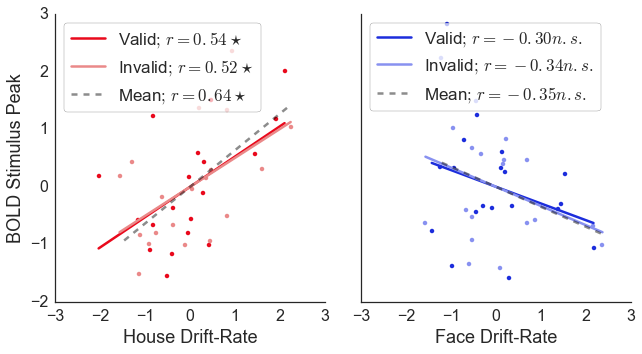

In [325]:
brain = 'BOLD Stimulus Peak'
param = 'Drift-Rate'
stim = ['House', 'Face']
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

#x=[msm.zH2b.values, msm.zF2b.values,
#   msm.zF2a.values, msm.zH2a.values]

#x=[wpk_ffa["hc-hcH"], wpk_ffa["fc"],
#    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]

x=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values,
   np.mean([msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values], axis=0),
   msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values,
   np.mean([msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values], axis=0)]

#x=[msm.zH2b.values, msm.zF2b.values,
#   np.mean([msm.zH2b.values, msm.zF2b.values], axis=0),
#   msm.zF2a.values, msm.zH2a.values,
#  np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]
   
bold=[bpk_ppa["hcH"], bpk_ppa["fcH"],
      np.mean([bpk_ppa["hcH"].values, bpk_ppa["fcH"].values], axis=0),
    bpk_ffa["fcF"], bpk_ffa["hcF"],
     np.mean([bpk_ffa["fcF"].values, bpk_ffa["hcF"].values], axis=0)]

f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes

for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/WIN_pearson_DriftRate_StimPeakOnly.png', dpi=600)

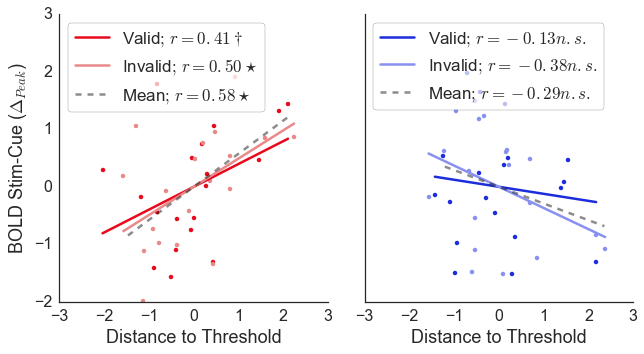

In [24]:
brain = 'BOLD Stim-Cue ($\Delta_{Peak}$)'
param = 'to Threshold'
stim = hs(['Distance']*2).tolist()
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.zH2b.values, msm.zF2b.values,
   np.mean([msm.zH2b.values, msm.zF2b.values], axis=0),
   msm.zF2a.values, msm.zH2a.values,
  np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]

#x=[wpk_ffa["hc-hcH"], wpk_ffa["fc"],
#    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]
#x=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
#   msm.vFF_n_a.values, msm.vHF_n_a.values]

x=[msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values,
   np.mean([msm.vHH_n_zH2b.values, msm.vFH_n_zF2b.values], axis=0),
   msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values,
   np.mean([msm.vFF_n_zF2a.values, msm.vHF_n_zH2a.values], axis=0)]

bold=[bpk_ppa["hc-hcH"], bpk_ppa["fc-fcH"],
      np.mean([bpk_ppa["hc-hcH"].values, bpk_ppa["fc-fcH"].values], axis=0),
      bpk_ffa["fc-fcF"], bpk_ffa["hc-hcF"],
      np.mean([bpk_ffa["fc-fcF"].values, bpk_ffa["hc-hcF"].values], axis=0)]



#bold=[wpk_ffa["hc"].values+wpk_ppa['hcH'].values, wpk_ffa["fc"].values+wpk_ppa["fcH"].values,
#      np.mean([wpk_ffa["hc"].values+wpk_ppa['hcH'].values, wpk_ffa["fc"].values+wpk_ppa["fcH"].values], axis=0),
#      wpk_ffa["fc-fcF"], wpk_ffa["hc-hcF"],
#      np.mean([wpk_ffa["fc-fcF"].values, wpk_ffa["hc-hcF"].values], axis=0)]




f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/WIN_DeltaBound_CueStim_Pearson.png', dpi=600)

In [23]:
[wpk_ppa.hc.mean()-wpk_ppa.nc.mean(), wpk_ppa.fc.mean()-wpk_ppa.nc.mean()]

[0.0015277994736841993, 0.0019511263157894754]

In [19]:
wtc_ppa['peak'] = wtc_ppa.loc[:, '1':].max(axis=1)
wpk_ppa

,hc,nc,fc,hcF,ncF,fcF,hcH,ncH,fcH,fc-fcH,fc-fcF,hc-hcH,hc-hcF
idx,,,,,,,,,,,,,
8,0.10605,0.05477,0.03842,0.05677,0.10034,0.09553,0.23129,0.29679,0.32827,0.28985,0.05711,0.12523,-0.04929
10,0.01982,0.00430,0.01500,0.15239,0.07660,0.06651,0.04702,0.09378,0.19992,0.18492,0.05151,0.02720,0.13257
11,0.07506,0.10199,0.07984,0.09416,0.12174,0.09117,0.15731,0.15983,0.24347,0.16364,0.01133,0.08225,0.01910
13,0.09643,0.08809,0.13918,0.04115,0.05769,0.05102,0.16654,0.16219,0.17506,0.03588,-0.08816,0.07011,-0.05528
15,0.16774,0.18214,0.16985,0.10266,0.14883,0.20706,0.40651,0.35616,0.56793,0.39808,0.03721,0.23877,-0.06507
16,0.08741,0.03547,0.12983,0.18111,0.18337,0.10687,0.32609,0.44475,0.47589,0.34607,-0.02295,0.23868,0.09370
17,0.09807,0.04996,0.05623,0.15730,0.11073,0.13027,0.10793,0.15291,0.29977,0.24355,0.07404,0.00986,0.05923
18,0.05555,0.08370,0.03898,0.06200,-0.01290,0.09513,0.29630,0.24714,0.25119,0.21221,0.05616,0.24075,0.00645
19,0.11264,0.13881,0.08303,0.15236,0.08524,0.13671,0.19450,0.28349,0.37500,0.29197,0.05368,0.08186,0.03972


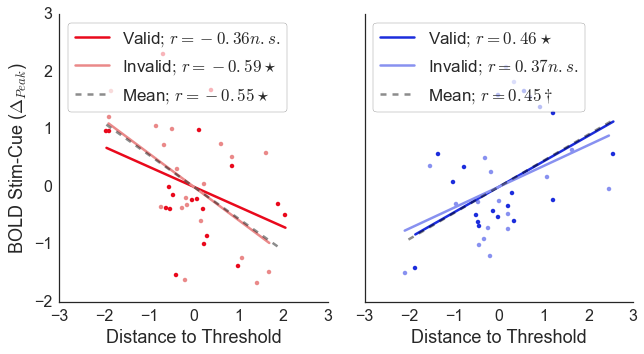

In [9]:
brain = 'BOLD Stim-Cue ($\Delta_{Peak}$)'
param = 'to Threshold'
stim = hs(['Distance']*2).tolist()
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.zH2b.values, msm.zF2b.values,
   np.mean([msm.zH2b.values, msm.zF2b.values], axis=0),
   msm.zF2a.values, msm.zH2a.values,
  np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]

#x=[wpk_ffa["hc-hcH"], wpk_ffa["fc"],
#    wpk_ppa["fc-fcF"], wpk_ppa["hc-hcF"]]
#x=[msm.vHH_n_a.values, msm.vFH_n_a.values, 
#   msm.vFF_n_a.values, msm.vHF_n_a.values]
   
bold=[wpk_ppa["hc-hcH"], wpk_ppa["fc-fcH"],
      np.mean([wpk_ppa["hc-hcH"].values, wpk_ppa["fc-fcH"].values], axis=0),
      wpk_ffa["fc-fcF"], wpk_ffa["hc-hcF"],
      np.mean([wpk_ffa["fc-fcF"].values, wpk_ffa["hc-hcF"].values], axis=0)]

f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/WIN_DeltaBound_CueStim_Pearson.png', dpi=600)

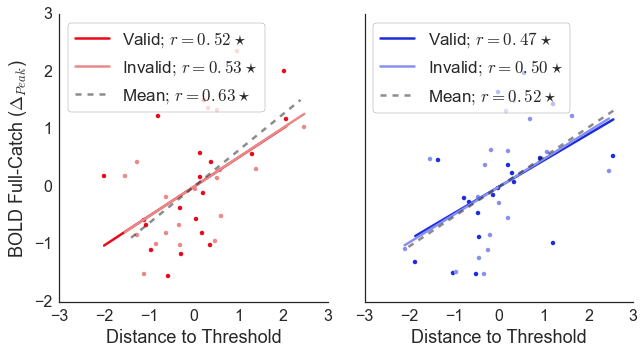

In [57]:
brain = 'BOLD Full-Catch ($\Delta_{Peak}$)'
param = 'to Threshold'
stim = hs(['Distance']*2).tolist()
cond = hs(['Valid', 'Invalid', 'Mean']*2).tolist()

x=[msm.zH2b.values, msm.zF2b.values,
   msm.zF2a.values, msm.zH2a.values]

bold=[bpk_ppa["hc-hcH"], bpk_ppa["fc-fcH"],
    bpk_ffa["fc-fcF"], bpk_ffa["hc-hcF"]]

x=[msm.vHH_n_a.values, msm.vFH_n_a.values,
   np.mean([msm.vHH_n_a.values, msm.vFH_n_a.values], axis=0),
   msm.zF2a.values, msm.zH2a.values,
   np.mean([msm.zF2a.values, msm.zH2a.values], axis=0)]


bold=[bpk_ppa["hcH"], bpk_ppa["fcH"],
      np.mean([bpk_ppa["hcH"].values, bpk_ppa["fcH"].values], axis=0),
      bpk_ffa["fc-fcF"], bpk_ffa["hc-hcF"],
      np.mean([bpk_ffa["fc-fcF"].values, bpk_ffa["hc-hcF"].values], axis=0)]


f = corrplots(x, bold, brain, param, stim, cond, normalize=True, test='pearson', calc_slope=False)
axes=f.axes
for i, ax in enumerate(axes):
      ax.set_ylim(-2, 3)
      ax.set_xlim(-3, 3)
      if i==1:
            ax.set_ylabel('')
#f.savefig('/home/kyle/Dropbox/BW_DeltaBound_CueStim_pearson.png', dpi=600)

In [8]:
def get_slopes(df, start='2', direction='pos'):
      slopes=[]
      if 'idx' in df.columns:
            sub_id_string = 'idx'
      elif 'sx' in df.columns:
            sub_id_string = 'sx'
      elif any([x==df.index.name] for x in ['idx', 'sx']):
            sub_id_string = df.index.name
            df.reset_index(inplace=True)
      
      
      for i, (sx, sxvec) in enumerate(df.groupby(sub_id_string)):
            xhigh=np.where(sxvec.values==sxvec[start].values)[1][0]
            yhigh=sxvec[start].values[0]
            if direction=='pos':
                  xlow=np.where(sxvec.values==sxvec[start].values)[1][0]
                  ylow=sxvec[start].values[0]
                  xhigh=np.where(sxvec.values==np.max(sxvec.ix[:,start:].values[0][1:]))[1][0]
                  yhigh=np.max(sxvec.ix[:,start:].values)

            elif direction=='neg':
                  xlow=np.where(sxvec.values==np.min(sxvec.ix[:,start:].values[0][1:]))[1][0]
                  ylow=np.min(sxvec.ix[:,start:].values)
                  xhigh=np.where(sxvec.values==sxvec[start].values)[1][0]
                  yhigh=sxvec[start].values[0]

            else: 
                  print "direction must be string, 'pos' or 'neg'"
                  return []
            
            slopes.append((yhigh-ylow)/(xhigh-xlow))
      return np.array(slopes)    

def corrplots(x, y, brain, param, stim, cond, test='pearson', start='1', direct='pos', normalize=False, calc_slope=True, switch=2):
      sns.set(style='white', font_scale=1.6)
      #conditions = [' '.join(stimcond) for stimcond in itertools.product(stim, cond)]
      #clist=[blues[0], blues[-1], reds[0], reds[-1]]
      #clist = hs([blues[::-1], reds[::-1]]).tolist()[::-1]
      b=['#1c2ddc', '#8891f0']
      r=['#e9091c', '#ea8989']
      clist=hs([r, b]).tolist()
      if len(y)==2:
            switch=1
            clist= [clist[0], clist[2]]
      if len(y)>4:
            clist.insert(2, 'k')
            clist.insert(5, 'k')
            switch=3
      f, (ax1, ax2) = plt.subplots(1,2, figsize=(9,5), sharey=True, sharex=True)
      #f, ax1 = plt.subplots(1, figsize=(6,5.5))
      for i, (xi, yi) in enumerate(zip(x, y)):
            if i < switch:
                  ax=ax1
            else: 
                  ax=ax2

            if calc_slope:
                  yi = get_slopes(yi, start, direction=direct)
            
            if normalize:
                  xi = (xi - xi.mean())/xi.std()
                  yi = (yi - yi.mean())/yi.std()
            
            plot_regression(xi, yi, robust=False, color=clist[i], ax=ax, cond=cond[i], test=test)

      for i, ax in enumerate([ax1, ax2]):
            ax.legend(loc=2, fancybox=True, frameon=True, framealpha=.7, fontsize=17)
            ax.set_xlabel(' '.join([stim[i], param]), fontsize=18)
      
      ax1.set_ylabel(brain, fontsize=18)
      plt.tight_layout()
      return f
    
def plot_regression(x, y, robust=True, color='Navy', cond=None, title=None, test='pearson', ax=None, alpha=1):
      
      if ax is None:
            f, ax = plt.subplots(1)
      if test == 'ci':
            cis = boot.ci((x, y), statfunction=stats.linregress, alpha=.05, method='bca')[:,2]
            legend = '$\/CI_{95%s}[%.2f, %.2f]$' % ('\%', cis[0], cis[1])
      elif test in ['pearson', 'spearman']:
            if test=='pearson':       
                  rho, pval = pearsonr(x, y)
                  rho_id =';\/r='
            elif test=='spearman':  
                  rho, pval = spearmanr(x, y) 
                  rho_id =';\/r_{s}='
            if pval<=.05: sym = '\star'   
            elif pval<=.1: sym='\dagger'
            else: sym = 'n.s.'
            legend =r'$%s%.2f%s$' % (rho_id, rho, sym)
      else:
            raise ValueError('test must be ci, pearson, or spearman')
      
      if cond:
            legend = cond + legend
      if color=='k':
            alphaM=0.0
            alphaL=0.45
            ls='--'
      else:
            alphaL=1
            alphaM=1
            ls='-'
      sns.regplot(x, y, robust=robust, truncate=True, fit_reg=True, ci=None, line_kws={"color":color, 'lw':2.5, 'label':legend, 'alpha':alphaL, 'linestyle':ls}, scatter_kws={'color':color, 'alpha':alphaM}, ax=ax)
      sns.despine()
      plt.tight_layout()